# **Project Title**: Bias correction of numerical prediction model temperature forecast


---



## **Group Members:**




N Surya Sri Nitya - S20200010143

Gurram Yashaswi - S20200010073

In [61]:
import pandas as pd
import numpy as np

In [62]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [63]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load Dataset

In [64]:
data = pd.read_csv('Bias_correction_ucl.csv')
data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [65]:
data.shape

(7752, 25)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [67]:
data.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [68]:
data.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [69]:
data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [70]:
data.drop(data.tail(2).index, inplace=True)

In [71]:
data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [75]:
data.groupby('station')['Next_Tmax'].mean()

station
1.0     27.518710
2.0     29.996774
3.0     30.257419
4.0     30.688065
5.0     30.201311
6.0     30.629739
7.0     30.145098
8.0     30.300977
9.0     30.449677
10.0    29.399355
11.0    30.637662
12.0    29.971845
13.0    30.672581
14.0    30.452581
15.0    30.363961
16.0    29.500324
17.0    30.009355
18.0    31.693871
19.0    30.098382
20.0    30.028803
21.0    30.097742
22.0    30.877273
23.0    31.087742
24.0    30.877346
25.0    30.935161
Name: Next_Tmax, dtype: float64

In [76]:
data.groupby('station')['Next_Tmin'].mean()

station
1.0     20.893871
2.0     21.873548
3.0     23.146129
4.0     23.296129
5.0     22.764918
6.0     23.801307
7.0     23.505229
8.0     23.493160
9.0     22.850645
10.0    21.670000
11.0    23.352597
12.0    21.943689
13.0    23.633548
14.0    23.271290
15.0    23.024026
16.0    21.805178
17.0    21.284516
18.0    23.705806
19.0    22.360841
20.0    22.724919
21.0    23.588387
22.0    23.537013
23.0    23.917742
24.0    24.043689
25.0    23.855484
Name: Next_Tmin, dtype: float64

In [12]:
m = data.mean()
data.fillna(m, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_28100\3110657668.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  m = data.mean()


In [13]:
data.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [14]:
data.shape

(7750, 25)

# Exploratory Data Analysis

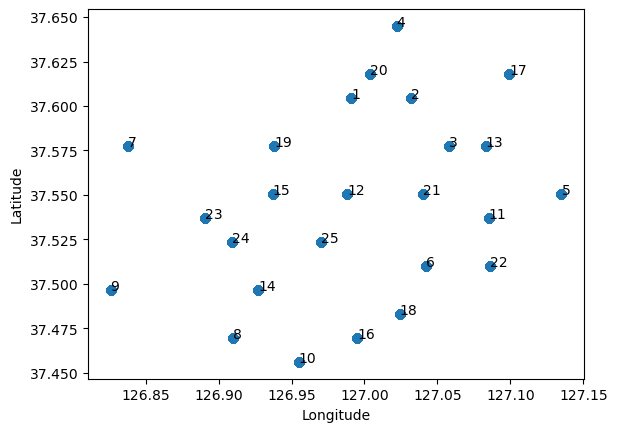

In [15]:
fig, ax = plt.subplots()
plt.scatter(data.lon, data.lat)
labels = [i for i in range(1,len(data.station.unique())+1)]
plt.xlabel('Longitude')
plt.ylabel('Latitude')
for i, txt in enumerate(labels):
  ax.annotate(txt, (data['lon'][i],data['lat'][i]))

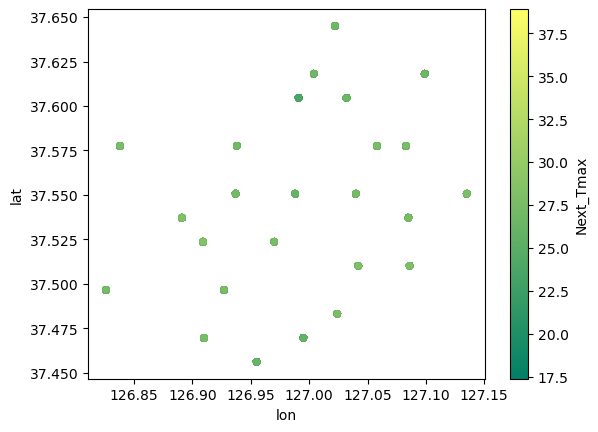

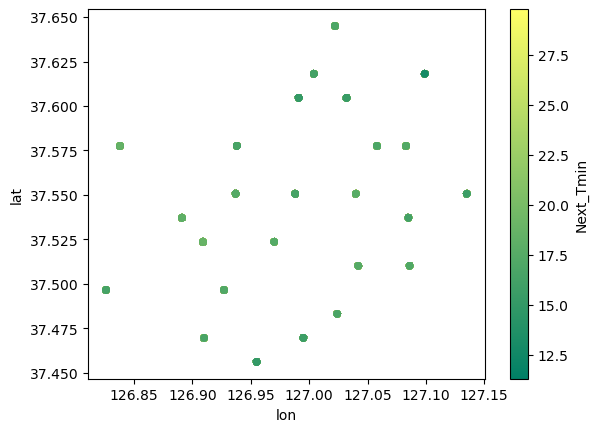

In [16]:
data.plot(x="lon", y="lat", kind="scatter", c="Next_Tmax", colormap="summer")
data.plot(x="lon", y="lat", kind="scatter", c="Next_Tmin", colormap="summer")
plt.show()



*   These are the plots for Next_Tmax and Next_Tmin for 25 stations
*  There are regions that are hotter than others but mostly we can see that there is no much difference in temperatures as they almost look similar.





In [17]:
df = data.copy()
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [18]:
df["year"] = df["Date"].apply(lambda x: x[:4]) #get the year from the date
df["month"] = df["Date"].apply(lambda x: x[5:7]) #get the month from the date
df["day"] = df["Date"].apply(lambda x: x[8:]) #get the day from the date

In [19]:
df.year.value_counts()

2013    1550
2014    1550
2015    1550
2016    1550
2017    1550
Name: year, dtype: int64

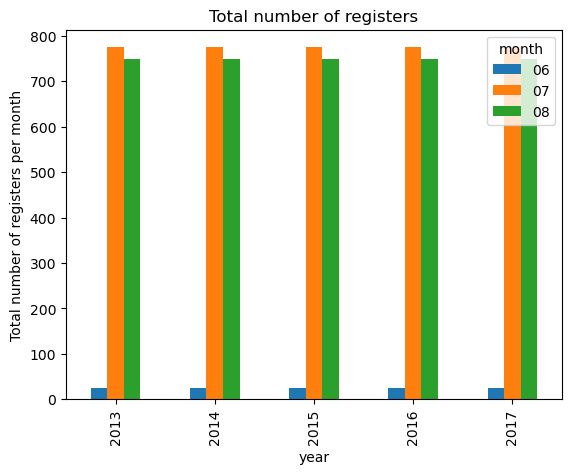

In [20]:
df.groupby('month').year.value_counts().unstack(0).plot.bar()
plt.ylabel('Total number of registers per month')
plt.title("Total number of registers");

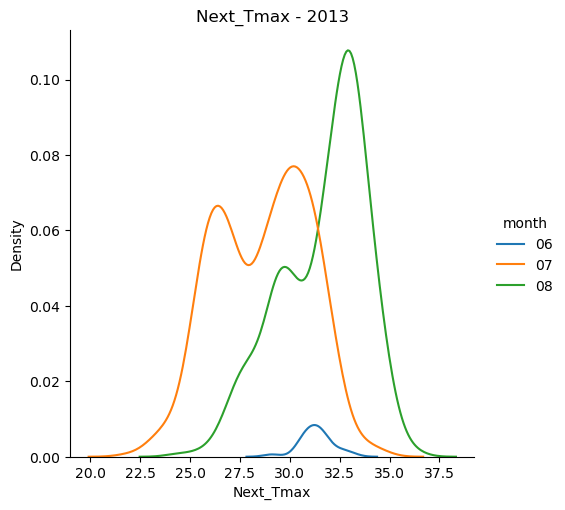

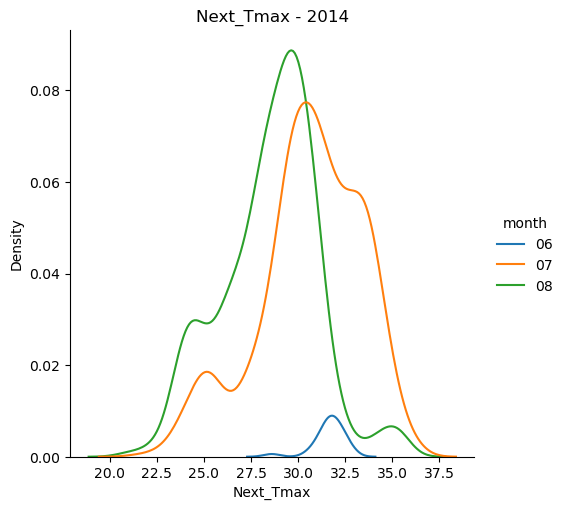

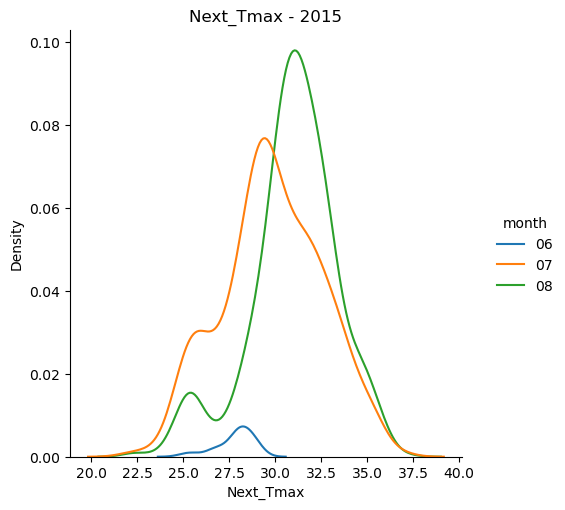

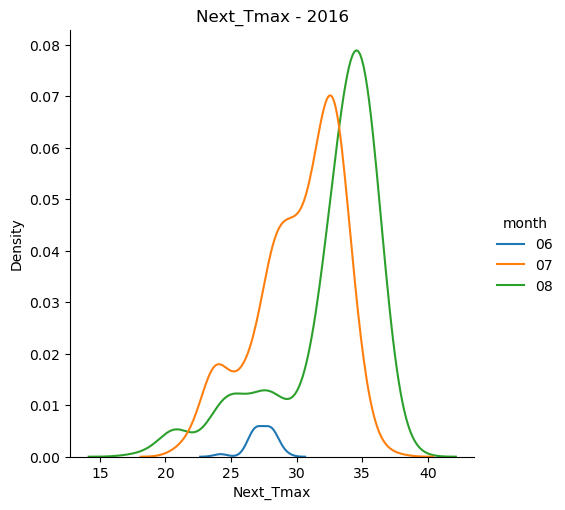

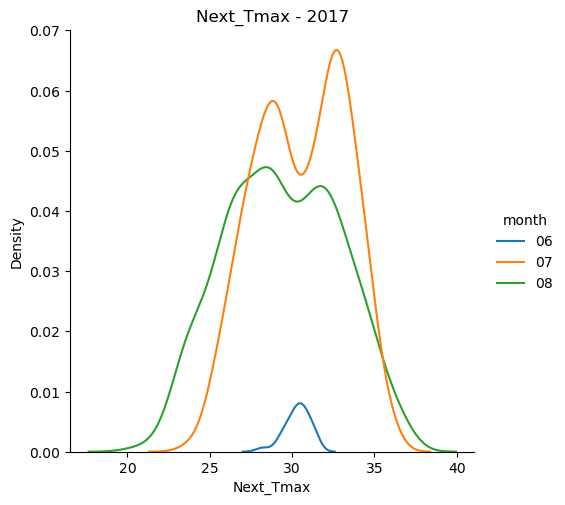

In [21]:
years = df.year.unique()
for year in years:
  sns.displot(df[df.year==year], x='Next_Tmax', hue="month", kind='kde').set(title= 'Next_Tmax'+" - "+year)

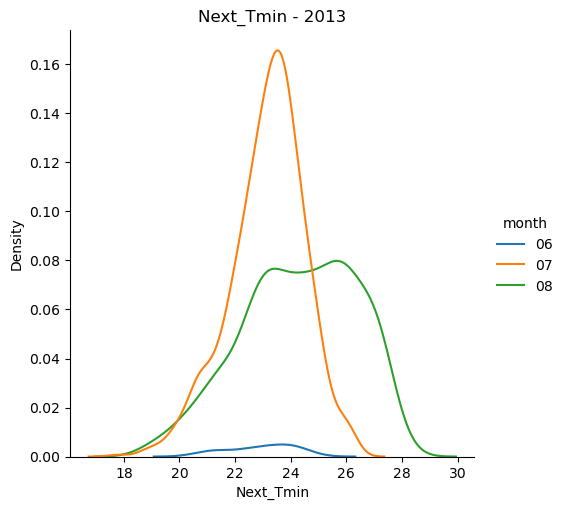

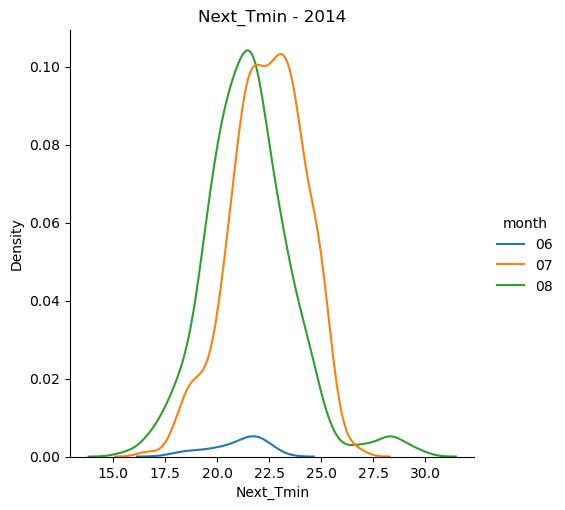

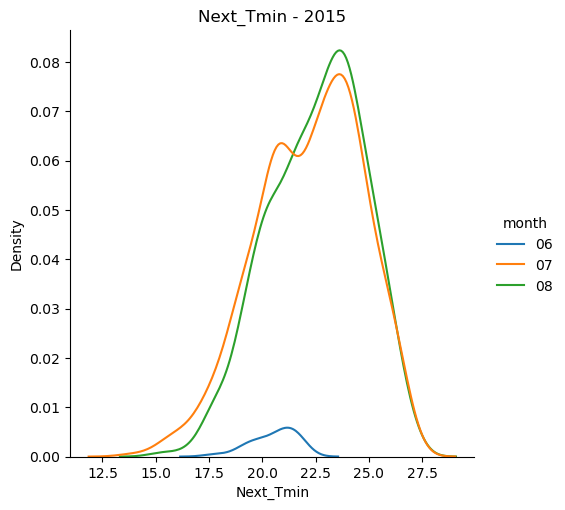

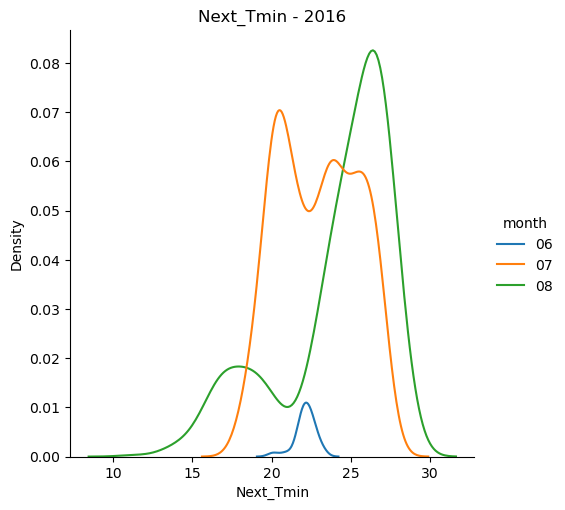

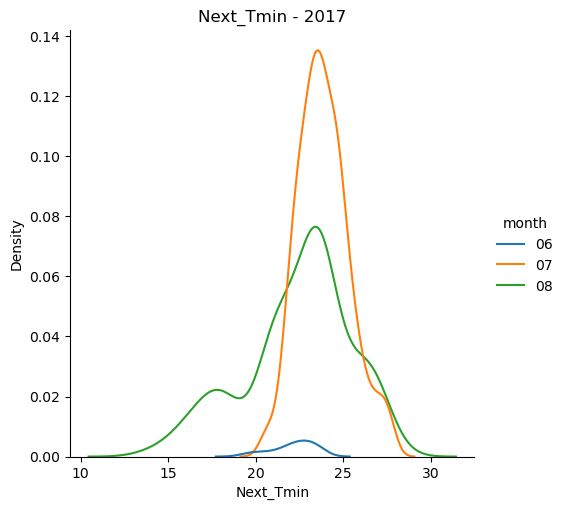

In [22]:
years = df.year.unique()
for year in years:
  sns.displot(df[df.year==year], x='Next_Tmin', hue="month", kind='kde').set(title= 'Next_Tmin'+" - "+year)



*   We notice maximum next day temperatures are recorded in July and August
*  Also, minimum next day temperatures are recorded in June







> Visualisation of column data



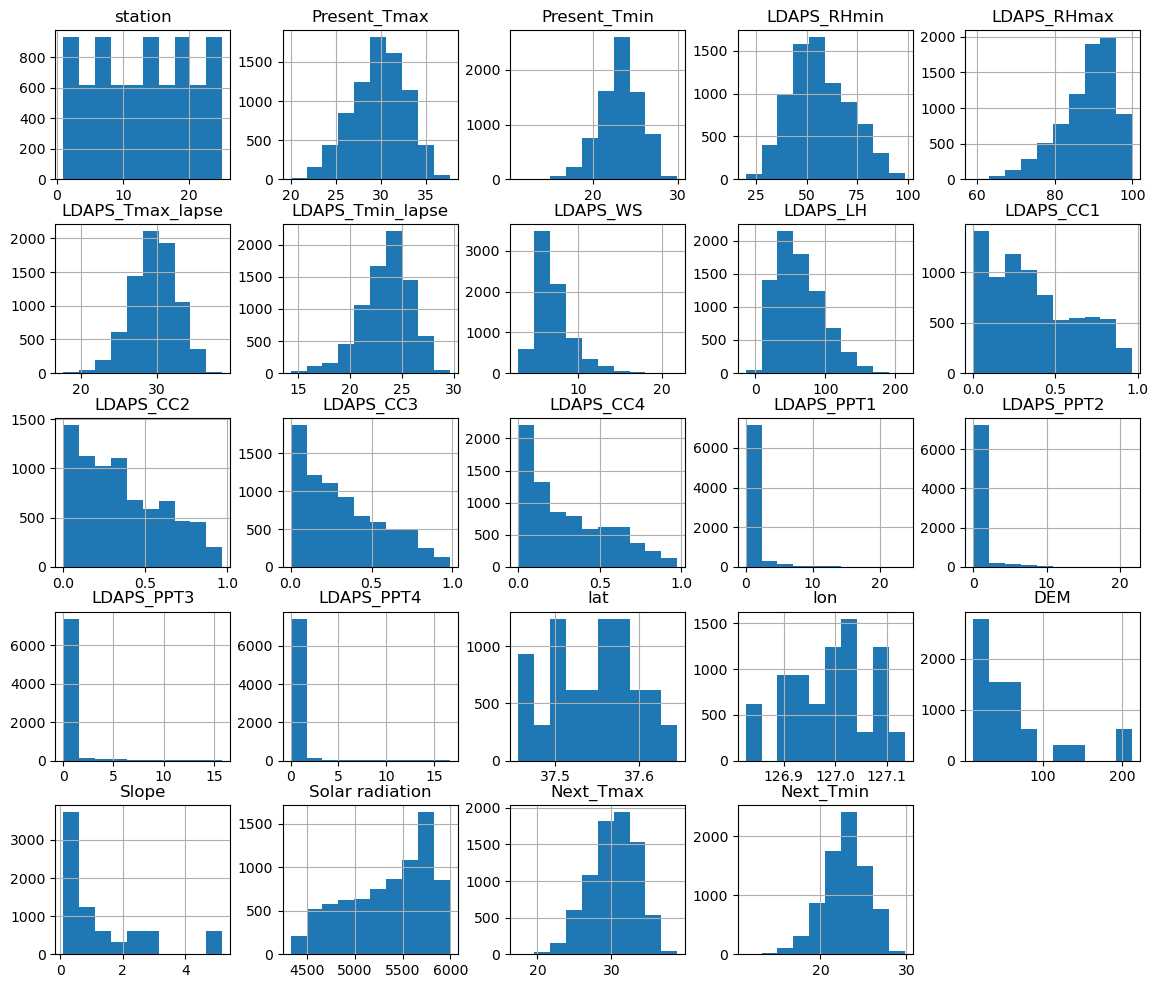

In [23]:
data.hist(figsize = (14,12));

In [24]:
corr_matrix = data.corr()
corr_matrix

C:\Users\hp\AppData\Local\Temp\ipykernel_28100\184011309.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.112786,0.131921,-0.066796,-0.167196,0.069223,0.104911,0.005294,-0.133575,0.006922,...,-0.008328,-0.012609,-0.010529,-0.237610,-0.118763,-0.255970,-0.090113,-0.019011,0.108154,0.128539
Present_Tmax,0.112786,1.000000,0.617699,-0.207063,-0.304831,0.568959,0.622540,-0.125521,0.133330,-0.313700,...,-0.104803,-0.126718,-0.105781,-0.054132,0.007527,-0.188779,-0.107333,-0.027008,0.609320,0.621706
Present_Tmin,0.131921,0.617699,1.000000,0.120862,-0.018413,0.462183,0.762220,-0.038563,-0.012370,0.082933,...,0.064403,-0.051841,-0.068998,-0.080520,-0.045560,-0.252518,-0.148301,0.051659,0.469903,0.795860
LDAPS_RHmin,-0.066796,-0.207063,0.120862,1.000000,0.578472,-0.568528,0.087426,0.292438,-0.073447,0.613375,...,0.390469,0.238624,0.165641,0.085909,-0.077696,0.100944,0.122597,0.243102,-0.441382,0.092732
LDAPS_RHmax,-0.167196,-0.304831,-0.018413,0.578472,1.000000,-0.377319,-0.117110,0.133479,0.237121,0.436177,...,0.228819,0.133394,0.116427,0.194782,0.024226,0.176423,0.218953,0.147952,-0.287320,-0.075298
LDAPS_Tmax_lapse,0.069223,0.568959,0.462183,-0.568528,-0.377319,1.000000,0.652948,-0.317239,0.045198,-0.441029,...,-0.249766,-0.196162,-0.168065,-0.043896,0.089051,-0.180868,-0.164272,0.046231,0.826630,0.585411
LDAPS_Tmin_lapse,0.104911,0.622540,0.762220,0.087426,-0.117110,0.652948,1.000000,-0.133944,-0.137862,0.009424,...,-0.003375,-0.094489,-0.100741,-0.098014,-0.028430,-0.197252,-0.187627,0.158568,0.585728,0.879809
LDAPS_WS,0.005294,-0.125521,-0.038563,0.292438,0.133479,-0.317239,-0.133944,1.000000,0.002215,0.288147,...,0.183573,0.152102,0.134116,0.034599,-0.061801,0.189109,0.169553,0.120291,-0.347861,-0.100693
LDAPS_LH,-0.133575,0.133330,-0.012370,-0.073447,0.237121,0.045198,-0.137862,0.002215,1.000000,-0.149353,...,-0.085559,0.008335,0.012161,0.131827,0.024216,0.053375,0.085062,-0.049058,0.155305,-0.058624
LDAPS_CC1,0.006922,-0.313700,0.082933,0.613375,0.436177,-0.441029,0.009424,0.288147,-0.149353,1.000000,...,0.389690,0.166757,0.088760,-0.009048,-0.007764,-0.015091,-0.021775,0.217643,-0.455046,-0.012730


<AxesSubplot:>

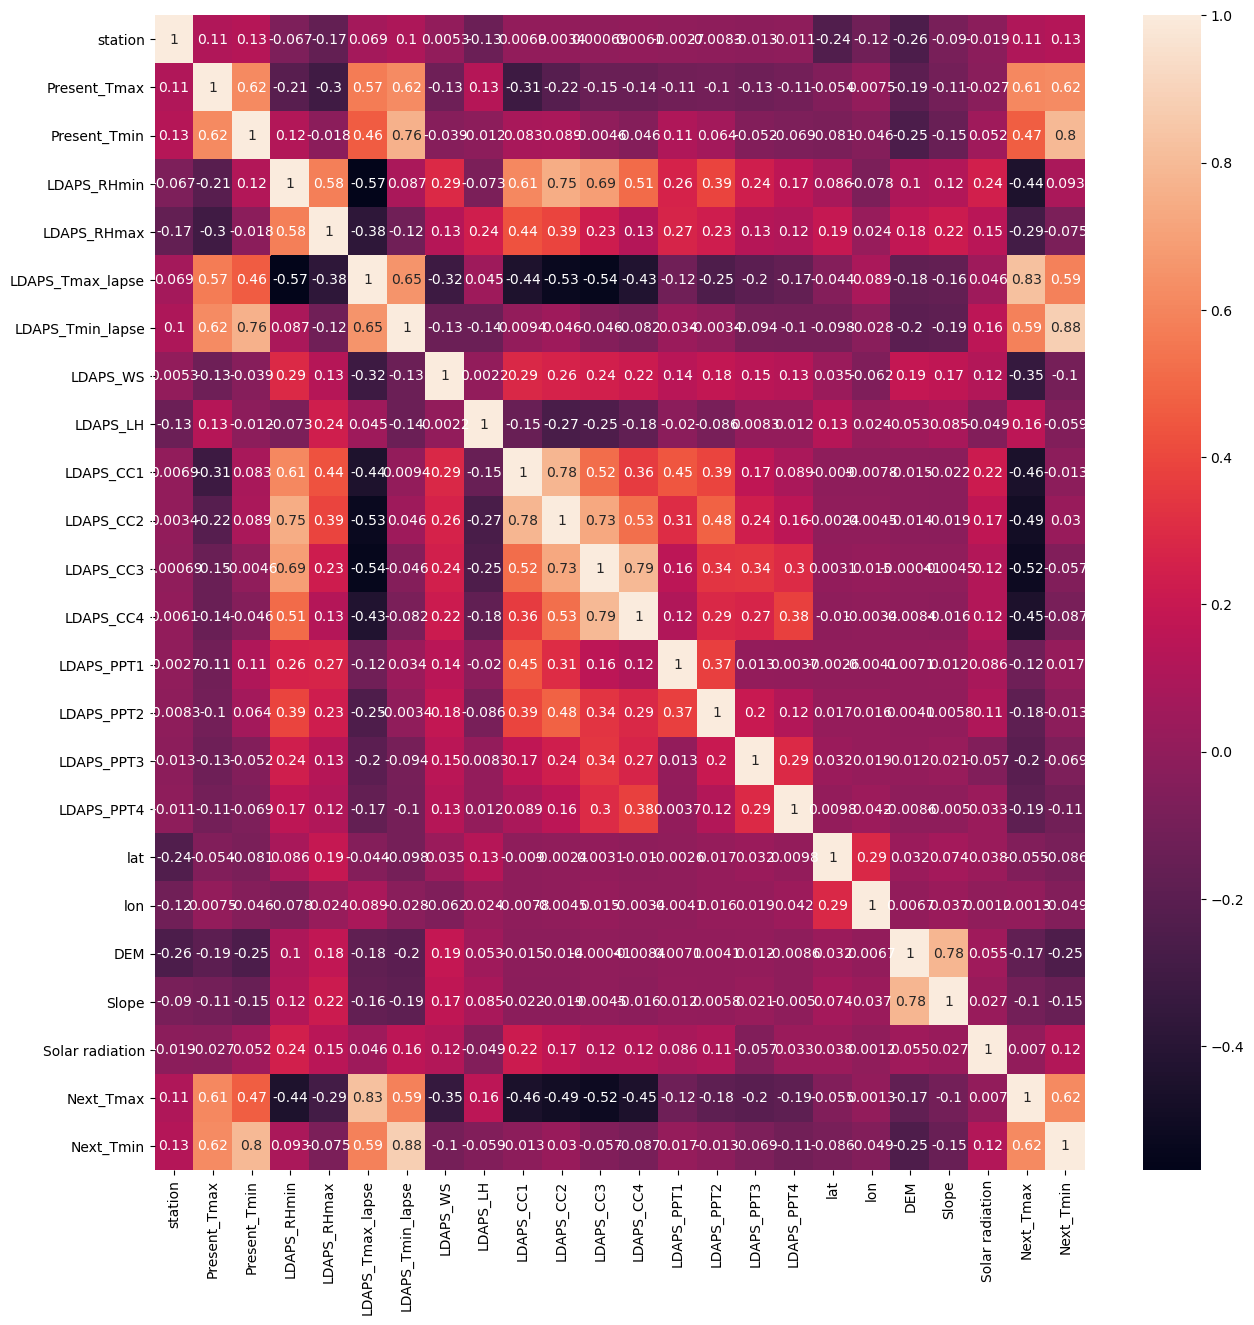

In [77]:
plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True)



*   Next_Tmax is highly correlated with Present_Tmax and LDAPS_Tmax_lapse
*   Next_Tmin is highly correlated with Present_Tmin and LDAPS_Tmin_lapse
*   We can observe that there is negative correlation between Next_Tmax and LDAPS_CC(6-hour split average cloud cover). So, this may be due to the reason that we have lower temperature on a cloudy day.




In [26]:
data.set_index('station', inplace=True)

In [27]:
data.sort_index(ascending=True, inplace=True)

In [28]:
data.head()

,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,,,,,,,,,,,,,,,,,,,,,
1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.000000,0.000000,0.000000,37.6046,126.991,212.335,2.785,5992.895996,29.1,21.2
1.0,2014-08-11,25.5,17.0,56.245464,98.003204,27.877388,20.778081,7.744766,91.636080,0.247495,...,0.000000,0.000000,0.000000,37.6046,126.991,212.335,2.785,5275.070313,27.5,19.2
1.0,2014-08-12,27.1,19.3,70.969574,94.705147,24.727813,21.278296,4.644157,34.767144,0.244190,...,0.000000,0.001953,0.000000,37.6046,126.991,212.335,2.785,5245.199219,24.0,19.4
1.0,2014-08-13,23.6,20.0,73.326073,96.582756,23.109039,19.427575,4.387503,48.927397,0.636515,...,0.005169,0.007080,0.000000,37.6046,126.991,212.335,2.785,5214.742188,21.1,18.2
1.0,2014-08-14,20.6,18.2,61.651886,93.923744,26.859750,19.505854,5.691575,77.763641,0.306004,...,0.000837,0.234512,0.001661,37.6046,126.991,212.335,2.785,5183.697266,26.2,18.3


In [29]:
data.columns

Index(['Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [30]:
from pandas.core.computation.pytables import pprint_thing
ptmax=data['Present_Tmax']
ptmin=data['Present_Tmin']
rhmin=data['LDAPS_RHmin']
rhmax=data['LDAPS_RHmax']
tmaxlapse=data['LDAPS_Tmax_lapse']
tminlapse=data['LDAPS_Tmin_lapse']
ws=data['LDAPS_WS']
lh=data['LDAPS_LH']
cc1=data['LDAPS_CC1']
cc2=data['LDAPS_CC2']
cc3=data['LDAPS_CC3']
cc4=data['LDAPS_CC4']
ppt1=data['LDAPS_PPT1']
ppt2=data['LDAPS_PPT2']
ppt3=data['LDAPS_PPT3']
ppt4=data['LDAPS_PPT4']
lat=data['lat']
lon=data['lon']
dem=data['DEM']
slope=data['Slope']
radiation=data['Solar radiation']
#ntmax=data[]

In [31]:
import scipy.stats as stats
test_statistic, p_value = stats.bartlett(ptmax,ptmin,rhmin,rhmax,tmaxlapse,tminlapse,ws,lh,cc1,cc2,cc3,cc4,ppt1,ppt2,ppt3,ppt4,lat,lon,dem,slope,radiation)

In [32]:
print(p_value)

0.0


In [33]:
data1 = data.drop(columns=['Date', 'Next_Tmax', 'Next_Tmin'])

In [34]:
data1.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
station,,,,,,,,,,,,,,,,,,,,,
1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.335,2.785,5992.895996
1.0,25.5,17.0,56.245464,98.003204,27.877388,20.778081,7.744766,91.636080,0.247495,0.081229,...,0.051404,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.335,2.785,5275.070313
1.0,27.1,19.3,70.969574,94.705147,24.727813,21.278296,4.644157,34.767144,0.244190,0.607644,...,0.645781,0.000000,0.000000,0.001953,0.000000,37.6046,126.991,212.335,2.785,5245.199219
1.0,23.6,20.0,73.326073,96.582756,23.109039,19.427575,4.387503,48.927397,0.636515,0.688504,...,0.530906,0.425399,0.005169,0.007080,0.000000,37.6046,126.991,212.335,2.785,5214.742188
1.0,20.6,18.2,61.651886,93.923744,26.859750,19.505854,5.691575,77.763641,0.306004,0.239713,...,0.074535,0.000000,0.000837,0.234512,0.001661,37.6046,126.991,212.335,2.785,5183.697266


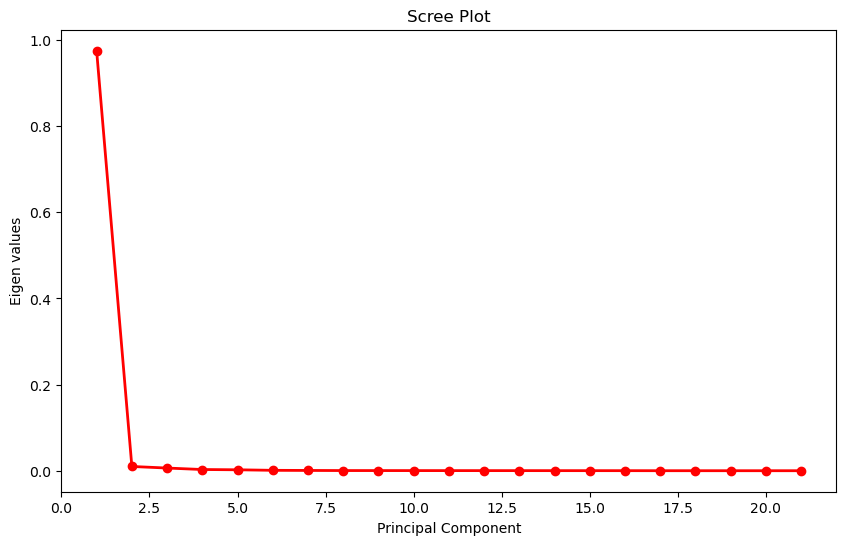

In [35]:
A,B,C=np.linalg.svd(data1)
eigen_values=B*2/np.sum(B*2)
figure=plt.figure(figsize=(10,6))
sing_vals=np.arange(len(eigen_values)) + 1
plt.plot(sing_vals,eigen_values, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigen values')
plt.show()

In [81]:
n_components = 2

pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data1)
print(data_pca)

[[-652.3638454   145.9953672 ]
 [  65.49806297  152.60473069]
 [  95.03615043  149.87792259]
 ...
 [-357.3074409   -43.95322361]
 [-327.14711629  -47.01038502]
 [ 890.54976718  -39.72799051]]


array([[-652.3638454 ,  145.9953672 ],
       [  65.49806297,  152.60473069],
       [  95.03615043,  149.87792259],
       ...,
       [-357.3074409 ,  -43.95322361],
       [-327.14711629,  -47.01038502],
       [ 890.54976718,  -39.72799051]])

In [37]:
x = data.drop(["Next_Tmax", "Next_Tmin", "Date"], axis='columns')
y_max = data["Next_Tmax"]
y_min = data["Next_Tmin"]

In [38]:
from sklearn.model_selection import train_test_split
x_train_max, x_test_max, y_train_max, y_test_max = train_test_split(x, y_max, test_size=.25, random_state=0)
x_train_min, x_test_min, y_train_min, y_test_min = train_test_split(x, y_min, test_size=.25, random_state=0)

In [39]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_max, y_train_max)
#Calculating the Intercept and Coefficient
print(regressor.intercept_)
print(regressor.coef_)
predictions_max = regressor.predict(x_test_max)

292.34748980652665
[ 1.54234111e-01  5.10055909e-02  2.44249899e-02 -3.28936798e-03
  6.12619701e-01  8.62759691e-02 -1.44273602e-01  7.11199588e-03
 -1.13135743e+00 -7.09033680e-01 -8.97865552e-01 -1.09524844e+00
 -2.61367431e-03  1.15436245e-01 -3.00520161e-02  4.49251489e-03
 -1.31186282e+00 -1.87571169e+00 -4.68475740e-03  2.06936097e-01
  3.31161982e-05]


In [40]:
bias_max = np.mean(predictions_max) - np.mean(y_test_max)
bias_max

-0.027119361806249742

In [41]:
from sklearn.metrics import r2_score
R2_max = r2_score(y_test_max,predictions_max)
print('R2 for Next_Tmax:', r2_score(y_test_max,predictions_max))

R2 for Next_Tmax: 0.7654235673074189


In [42]:
regressor.fit(x_train_min, y_train_min)
print(regressor.intercept_)
print(regressor.coef_)

102.82310708889132
[ 2.87353585e-02  2.54319091e-01  1.74292881e-02  4.61533471e-03
  7.38900635e-02  6.36220788e-01  2.03278101e-02  9.20519000e-04
 -4.36298249e-01  1.93841577e-01 -3.52199989e-01  1.10974454e-01
 -2.98730034e-02 -3.23659174e-02  3.93592034e-02 -6.31671332e-02
 -4.67973073e-01 -6.89202028e-01 -7.90761102e-03  2.42398061e-01
  1.66201118e-05]


In [43]:
predictions_min = regressor.predict(x_test_min)

In [44]:
bias_min = np.mean(predictions_min) - np.mean(y_test_min)
bias_min

0.0024021646178447043

In [45]:
R2_min = r2_score(y_test_min, predictions_min)
print('R2 for Next_Tmin:', r2_score(y_test_min, predictions_min))

R2 for Next_Tmin: 0.8267542876094037


In [47]:
r2_values_max = {}
r2_values_min = {}
for i in data.index:
    x = data[data.index==i].drop(["Next_Tmax", "Next_Tmin", "Date"], axis='columns')
    y_max = data[data.index==i]["Next_Tmax"]
    y_min = data[data.index==i]["Next_Tmin"]
    x_train_max, x_test_max, y_train_max, y_test_max = train_test_split(x, y_max, test_size=.25, random_state=0)
    x_train_min, x_test_min, y_train_min, y_test_min = train_test_split(x, y_min, test_size=.25, random_state=0)
    regressor = LinearRegression()
    regressor.fit(x_train_max, y_train_max)
    predictions_max = regressor.predict(x_test_max)
    r2_max = r2_score(y_test_max, predictions_max)
    r2_values_max[f"Station {i}"] = r2_max
    regressor.fit(x_train_min, y_train_min)
    predictions_min = regressor.predict(x_test_min)
    r2_min = r2_score(y_test_min, predictions_min)
    r2_values_min[f"Station {i}"] = r2_min

In [48]:
r2_values_max

{'Station 1.0': 0.7321006574540949,
 'Station 2.0': 0.726547648908169,
 'Station 3.0': 0.7406641660432751,
 'Station 4.0': 0.8360317018776915,
 'Station 5.0': 0.8290245152499311,
 'Station 6.0': 0.8303317216856352,
 'Station 7.0': 0.7380031078974859,
 'Station 8.0': 0.7046724218911766,
 'Station 9.0': 0.7361608010843446,
 'Station 10.0': 0.717010184253463,
 'Station 11.0': 0.6309074602561632,
 'Station 12.0': 0.6926466830714539,
 'Station 13.0': 0.775363199814196,
 'Station 14.0': 0.7603017043855543,
 'Station 15.0': 0.7501462462553873,
 'Station 16.0': 0.6448193192427274,
 'Station 17.0': 0.868817472944007,
 'Station 18.0': 0.7876305039837832,
 'Station 19.0': 0.7924843530324457,
 'Station 20.0': 0.6872840071085233,
 'Station 21.0': 0.8320675692325175,
 'Station 22.0': 0.6951200656195753,
 'Station 23.0': 0.6630807381766202,
 'Station 24.0': 0.8057249605989804,
 'Station 25.0': 0.7851206903574137}

In [49]:
r2_values_min

{'Station 1.0': 0.8636123692748221,
 'Station 2.0': 0.889968786922392,
 'Station 3.0': 0.820116736923499,
 'Station 4.0': 0.843780769355424,
 'Station 5.0': 0.8653684697447876,
 'Station 6.0': 0.8650406435317217,
 'Station 7.0': 0.8002127357382599,
 'Station 8.0': 0.8128379590891444,
 'Station 9.0': 0.8221818695610366,
 'Station 10.0': 0.8273063911169661,
 'Station 11.0': 0.7660382134610397,
 'Station 12.0': 0.6857732215538827,
 'Station 13.0': 0.8603174436629433,
 'Station 14.0': 0.8185536171611452,
 'Station 15.0': 0.8444905222599468,
 'Station 16.0': 0.7719098044763933,
 'Station 17.0': 0.8445406736123567,
 'Station 18.0': 0.7973628526346681,
 'Station 19.0': 0.8396533212774833,
 'Station 20.0': 0.7882289457320921,
 'Station 21.0': 0.8706005922006398,
 'Station 22.0': 0.8110441064582262,
 'Station 23.0': 0.7223705318897908,
 'Station 24.0': 0.787015518976147,
 'Station 25.0': 0.841238949333948}

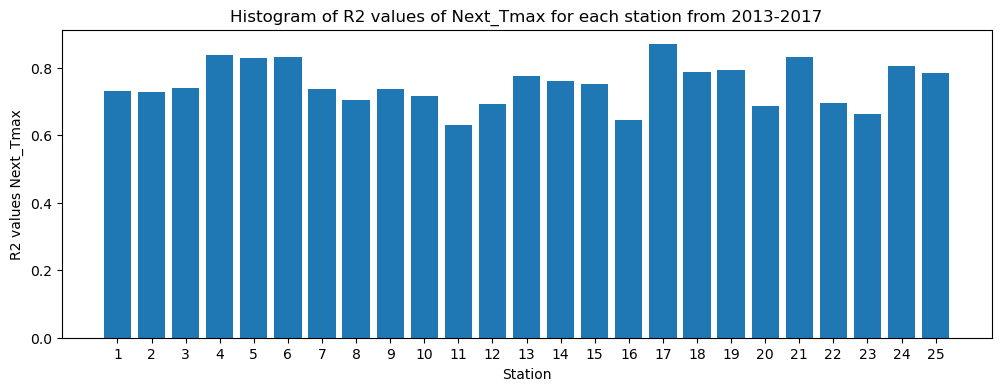

In [50]:
plt.subplots(figsize=(12,4))
plt.bar(range(1, len(r2_values_max)+1), list(r2_values_max.values()))
plt.xticks(range(1, len(r2_values_max)+1))
plt.xlabel('Station')
plt.ylabel('R2 values Next_Tmax')
plt.title('Histogram of R2 values of Next_Tmax for each station from 2013-2017')
plt.show()

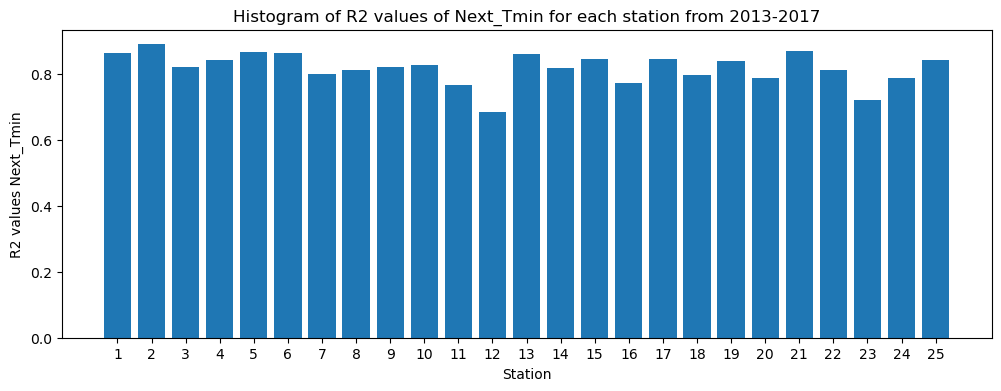

In [51]:
plt.subplots(figsize=(12,4))
plt.bar(range(1, len(r2_values_min)+1), list(r2_values_min.values()))
plt.xticks(range(1, len(r2_values_min)+1))
plt.xlabel('Station')
plt.ylabel('R2 values Next_Tmin')
plt.title('Histogram of R2 values of Next_Tmin for each station from 2013-2017')
plt.show()

In [52]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train_max, y_train_max)
y_pred_max = rf.predict(x_test_max)

In [53]:
r2 = r2_score(y_test_max, y_pred_max)
r2

0.7751819506756913

In [54]:
rf.fit(x_train_min, y_train_min)
y_pred_min = rf.predict(x_test_min)

In [55]:
r2_min = r2_score(y_test_min, y_pred_min)
r2_min

0.8356680932517491

In [56]:
bias_max_rf = np.mean(y_pred_max) - np.mean(y_test_max)
bias_max_rf

-0.154820512820514

In [57]:
bias_min_rf = np.mean(y_pred_min) - np.mean(y_test_min)
bias_min_rf

-0.04606410256410953